In [4]:
import pandas as pd
import numpy as np
import os
import csv
from pylab import*
import numpy as np
import scipy.stats 
from scipy.special import gamma
import seaborn as sns
from scipy.stats import beta
from scipy.stats import spearmanr


In [5]:
#Ejercicio 2 
#Leemos nuestro archivo
bd = "data_schools.xlsx"
bd_escuelas=pd.read_excel(bd)
bd_escuelas

,escuela,LSAT,GPA
0,1,622,3.23
1,2,542,2.83
2,3,579,3.24
3,4,653,3.12
4,5,606,3.09
...,...,...,...
77,78,590,3.15
78,79,558,2.81
79,80,611,3.16
80,81,564,3.02


In [6]:
#Seleccionamos aleatoriamente 15 escuelas
escuelas_random = bd_escuelas.sample(n=15,random_state=5)[["escuela"]]
escuelas_random["f_seleccion"]=1
escuelas_random

,escuela,f_seleccion
45,46,1
28,29,1
10,11,1
33,34,1
22,23,1
17,18,1
37,38,1
12,13,1
40,41,1
54,55,1


In [7]:
#Agregamos una columna f_seleccion, donde 1 es el renglon seleccionado en el anterior punto
# y 0 es el renglon no seleccionado
bd_escuelas=pd.merge(bd_escuelas,escuelas_random, how="left",on=["escuela"])
bd_escuelas["f_seleccion"]=bd_escuelas["f_seleccion"].fillna(0)
bd_escuelas["f_seleccion"]=bd_escuelas["f_seleccion"].astype(int)
bd_escuelas


,escuela,LSAT,GPA,f_seleccion
0,1,622,3.23,0
1,2,542,2.83,0
2,3,579,3.24,0
3,4,653,3.12,0
4,5,606,3.09,0
...,...,...,...,...
77,78,590,3.15,1
78,79,558,2.81,0
79,80,611,3.16,0
80,81,564,3.02,0


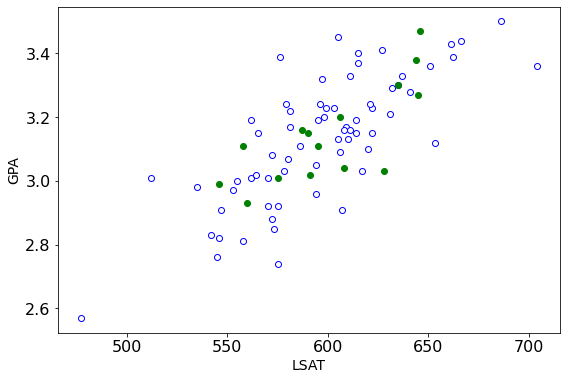

In [8]:
#Grafico de nuestra base
#Los puntos verdes son las escuelas seleccionados 
#Los puntos azules son las escuelas no seleccionadas
fig, ax =plt.subplots(figsize=(9,6))
plot(bd_escuelas[bd_escuelas["f_seleccion"]==0].LSAT,
    bd_escuelas[bd_escuelas["f_seleccion"]==0].GPA,"o",color="blue" , markerfacecolor="white")
plot(bd_escuelas[bd_escuelas["f_seleccion"]==1].LSAT,
    bd_escuelas[bd_escuelas["f_seleccion"]==1].GPA,"o",color="green")

xlabel("LSAT",size=14)
ylabel("GPA",size=14)

xticks(fontsize=16)
yticks(fontsize=16)

show()


In [9]:
bd_escuelasm = bd_escuelas[ bd_escuelas["f_seleccion"]==1]
bd_escuelasm

,escuela,LSAT,GPA,f_seleccion
10,11,558,3.11,1
12,13,635,3.30,1
17,18,646,3.47,1
20,21,546,2.99,1
22,23,628,3.03,1
23,24,575,3.01,1
26,27,608,3.04,1
28,29,587,3.16,1
33,34,591,3.02,1
37,38,606,3.20,1


In [10]:
#Correlacion de la muestra seleccionada
corr,_=spearmanr(bd_escuelas[bd_escuelas["f_seleccion"]==1].LSAT, bd_escuelas[bd_escuelas["f_seleccion"]==1].GPA)
print('Spearmans correlation:%3f' %corr)                                                                

Spearmans correlation:0.747096


In [11]:
#Correlacion de toda la base
corr,_=spearmanr(bd_escuelas.LSAT, bd_escuelas.GPA)
print('Spearmans correlation:%3f' %corr)

Spearmans correlation:0.752662


Vamos a simular 3200 muestras bootstrap para ver el sesgo que se recupera

In [13]:
#Realizamos una simulacion con los datos seleccionados de la columna lsat
simul=3200
m=np.array([])
lsat=np.array([558,635,646,546,628,575,608,587,591,606,595,644,645,560,590])
for i in range(0,simul):
    x_i=np.random.choice(lsat,len(lsat),replace=True)
    m=np.append(m,x_i)
m=np.reshape(m,(simul, len(lsat)))    

prom_lsat=np.array([])
for i in range(0,simul):
    prom_i=np.mean(m[i])
    prom_lsat=np.append(prom_lsat,prom_i)
    
mediana_lsat=np.array([])
for i in range(0,simul):
    mediana_i=np.median(m[i])
    mediana_lsat=np.append(mediana_lsat,mediana_i)   
    

Ya que obtuvimos la media, graficamos el promedio con y sin Bootstraping

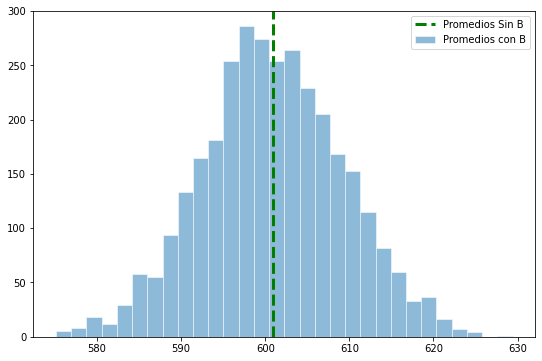

In [17]:
#Grafico del promedio con y sin Bootstraping
fig, ax = plt.subplots(figsize=(9,6))
hist(prom_lsat, bins=30, alpha=0.5, edgecolor="white", label="Promedios con B")
axvline(x=np.mean(lsat), color = "green", linestyle = '--', linewidth=3, label="Promedios Sin B")
legend()
show()

In [18]:
prom_lsat

array([599.86666667, 584.13333333, 600.93333333, ..., 595.13333333,
       605.6       , 606.93333333])

In [19]:
sqrt(sum((prom_lsat-np.mean(prom_lsat))**2)/(simul-1))

8.37721096265955

In [22]:
#Error con base a la mediana
err1=sqrt(sum((mediana_lsat-np.mean(mediana_lsat))**2)/(simul-1))
err1

12.838179644181407

In [29]:
#Simulacion con la muestra seleccionada de la coliumna gpa
m2=np.array([])
gpa=np.array([3.11,3.30,3.47,2.99,3.03,3.01,3.04,3.16,3.02,3.20,3.11,3.38,3.27,2.93,3.15])
for i in range(0,simul):
    x_i=np.random.choice(gpa,len(gpa),replace=True)
    m2=np.append(m2,x_i)
    
m2=np.reshape(m2,(simul, len(gpa)))   

prom_gpa=np.array([])
for i in range(0,simul):
    prom_i=np.mean(m2[i])
    prom_gpa=np.append(prom_gpa,prom_i)
    
mediana_gpa=np.array([])
for i in range(0,simul):
    mediana_i=np.median(m2[i])
    mediana_gpa=np.append(mediana_gpa,mediana_i)
    

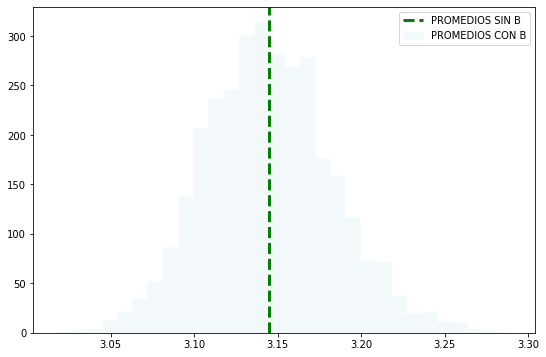

In [30]:
#Grafico de la media con y sin bootstraping
fig,ax = plt.subplots(figsize=(9,6))
hist(prom_gpa,bins=30,alpha=0.05,edgecolor="white",label="PROMEDIOS CON B")
axvline(x=np.mean(gpa),color="green",linestyle="--",linewidth=3,label="PROMEDIOS SIN B")
legend()
show()


In [31]:

sqrt(sum((prom_gpa-np.mean(prom_gpa))**2)/(simul-1))

0.03858894785050358

In [32]:
#Error con base a la mediana de la muestra gpa
err2=sqrt(sum((mediana_gpa-np.mean(mediana_gpa))**2)/(simul-1))
err2

0.05532038521131344

In [33]:
#Desviación estandar de las diferencias
f_err=np.sqrt((err1**2)+(err2**2))
f_err

12.838298832839723

In [34]:
x_lsat=mean(prom_lsat)
y_gpa=mean(prom_gpa)

In [35]:
x_lsat

600.8660833333333

In [36]:
y_gpa

3.1446022916666667

In [41]:
prom_lsat

array([599.86666667, 584.13333333, 600.93333333, ..., 595.13333333,
       605.6       , 606.93333333])

In [37]:
#Diferencia de los promedios
dif=x_lsat-y_gpa
dif

597.7214810416667

In [42]:
f_dif=prom_lsat-prom_gpa
f_dif

array([596.692     , 580.94666667, 597.81466667, ..., 591.93733333,
       602.48533333, 603.788     ])

In [43]:
#Error con el promedio
err_mean1=sqrt(sum((prom_lsat-np.mean(prom_lsat))**2)/(simul-1))
err_mean2=sqrt(sum((prom_gpa-np.mean(prom_gpa))**2)/(simul-1))
f_err_mean=np.sqrt((err_mean1**2)+(err_mean2**2))
f_err_mean


8.377299840628815

In [44]:
dif/f_err_mean

71.35013577319928

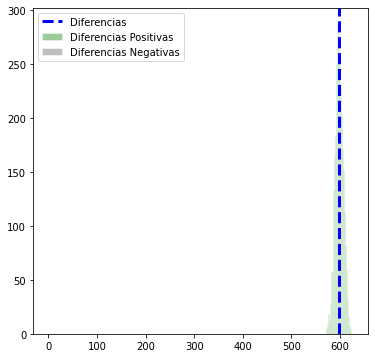

In [46]:
fig, ax = plt.subplots(figsize=(9,6))
hist(f_dif[f_dif>=0],bins=30,color="green", edgecolor="white", label="Diferencias Positivas", alpha= 0.4, )
hist(f_dif[f_dif<0],bins=30,color="gray", edgecolor="white", label="Diferencias Negativas", alpha= 0.5)
axvline(x=np.mean(dif), color="blue", linestyle="--", linewidth = 3, label = "Diferencias")
legend()
show()


Podemos concliuir que es una buena muestra, ya que el error es muy pequeño.

##Ahora lo realizaremos con N=14 

Realizamos el mismo procedimiento que para N=15

In [49]:
#Ejercicio 2 
bd = "data_schools.xlsx"
bd_escuelas=pd.read_excel(bd)
bd_escuelas

,escuela,LSAT,GPA
0,1,622,3.23
1,2,542,2.83
2,3,579,3.24
3,4,653,3.12
4,5,606,3.09
...,...,...,...
77,78,590,3.15
78,79,558,2.81
79,80,611,3.16
80,81,564,3.02


In [50]:
#Seleccionamos aleatoriamente 15 escuelas
escuelas_random = bd_escuelas.sample(n=14,random_state=5)[["escuela"]]
escuelas_random["f_seleccion"]=1
escuelas_random

,escuela,f_seleccion
45,46,1
28,29,1
10,11,1
33,34,1
22,23,1
17,18,1
37,38,1
12,13,1
40,41,1
54,55,1


In [51]:
bd_escuelas=pd.merge(bd_escuelas,escuelas_random, how="left",on=["escuela"])
bd_escuelas["f_seleccion"]=bd_escuelas["f_seleccion"].fillna(0)
bd_escuelas["f_seleccion"]=bd_escuelas["f_seleccion"].astype(int)
bd_escuelas

,escuela,LSAT,GPA,f_seleccion
0,1,622,3.23,0
1,2,542,2.83,0
2,3,579,3.24,0
3,4,653,3.12,0
4,5,606,3.09,0
...,...,...,...,...
77,78,590,3.15,0
78,79,558,2.81,0
79,80,611,3.16,0
80,81,564,3.02,0


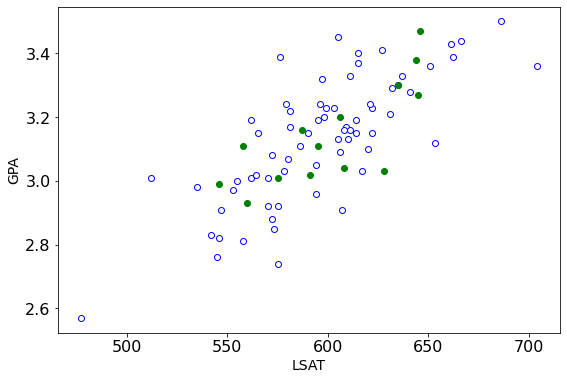

In [52]:
fig, ax =plt.subplots(figsize=(9,6))
plot(bd_escuelas[bd_escuelas["f_seleccion"]==0].LSAT,
    bd_escuelas[bd_escuelas["f_seleccion"]==0].GPA,"o",color="blue" , markerfacecolor="white")
plot(bd_escuelas[bd_escuelas["f_seleccion"]==1].LSAT,
    bd_escuelas[bd_escuelas["f_seleccion"]==1].GPA,"o",color="green")

xlabel("LSAT",size=14)
ylabel("GPA",size=14)

xticks(fontsize=16)
yticks(fontsize=16)

show()


In [53]:
bd_escuelasm = bd_escuelas[ bd_escuelas["f_seleccion"]==1]
bd_escuelasm

,escuela,LSAT,GPA,f_seleccion
10,11,558,3.11,1
12,13,635,3.30,1
17,18,646,3.47,1
20,21,546,2.99,1
22,23,628,3.03,1
23,24,575,3.01,1
26,27,608,3.04,1
28,29,587,3.16,1
33,34,591,3.02,1
37,38,606,3.20,1


In [54]:

#Quiero medir la presición de la correlación, de seleccionar 15 muestras al azar
#Obtener el error estándar de la correlación y mostrar para que n
#la presición es mejor con respecto a la correlación de la muestra total
#Grafique el histograma pero sobre una muestra boots considerando la muestra completa
corr,_=spearmanr(bd_escuelas[bd_escuelas["f_seleccion"]==1].LSAT, bd_escuelas[bd_escuelas["f_seleccion"]==1].GPA)
print('Spearmans correlation:%3f' %corr)   

Spearmans correlation:0.778878


In [55]:
 
corr,_=spearmanr(bd_escuelas.LSAT, bd_escuelas.GPA)
print('Spearmans correlation:%3f' %corr)

Spearmans correlation:0.752662


In [56]:
simul=3200
m=np.array([])
lsat=np.array([558,635,646,546,628,575,608,587,591,606,595,644,645,560])
for i in range(0,simul):
    x_i=np.random.choice(lsat,len(lsat),replace=True)
    m=np.append(m,x_i)
m=np.reshape(m,(simul, len(lsat)))    

prom_lsat=np.array([])
for i in range(0,simul):
    prom_i=np.mean(m[i])
    prom_lsat=np.append(prom_lsat,prom_i)
    
mediana_lsat=np.array([])
for i in range(0,simul):
    mediana_i=np.median(m[i])
    mediana_lsat=np.append(mediana_lsat,mediana_i)   
    

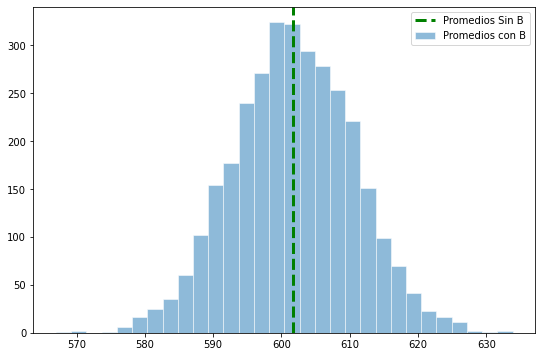

In [57]:
  
fig, ax = plt.subplots(figsize=(9,6))
hist(prom_lsat, bins=30, alpha=0.5, edgecolor="white", label="Promedios con B")
axvline(x=np.mean(lsat), color = "green", linestyle = '--', linewidth=3, label="Promedios Sin B")
legend()
show()

In [ ]:
prom_lsat

In [58]:
sqrt(sum((prom_lsat-np.mean(prom_lsat))**2)/(simul-1))

8.851199762091616

In [59]:
err1=sqrt(sum((mediana_lsat-np.mean(mediana_lsat))**2)/(simul-1))
err1


13.590743540893346

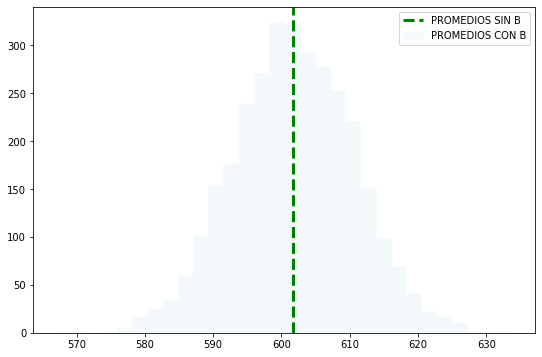

In [60]:
fig,ax = plt.subplots(figsize=(9,6))
hist(prom_lsat,bins=30,alpha=0.05,edgecolor="white",label="PROMEDIOS CON B")
axvline(x=np.mean(lsat),color="green",linestyle="--",linewidth=3,label="PROMEDIOS SIN B")
legend()
show()

In [62]:
m2=np.array([])
gpa=np.array([3.11,3.30,3.47,2.99,3.03,3.01,3.04,3.16,3.02,3.20,3.11,3.38,3.27,2.93])
for i in range(0,simul):
    x_i=np.random.choice(gpa,len(gpa),replace=True)
    m2=np.append(m2,x_i)
    
m2=np.reshape(m2,(simul, len(gpa)))   

prom_gpa=np.array([])
for i in range(0,simul):
    prom_i=np.mean(m2[i])
    prom_gpa=np.append(prom_gpa,prom_i)
    
mediana_gpa=np.array([])
for i in range(0,simul):
    mediana_i=np.median(m2[i])
    mediana_gpa=np.append(mediana_gpa,mediana_i)
    


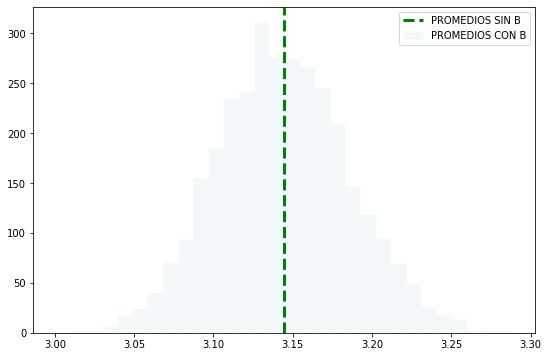

In [63]:
fig,ax = plt.subplots(figsize=(9,6))
hist(prom_gpa,bins=30,alpha=0.05,edgecolor="white",label="PROMEDIOS CON B")
axvline(x=np.mean(gpa),color="green",linestyle="--",linewidth=3,label="PROMEDIOS SIN B")
legend()
show()


In [64]:
sqrt(sum((prom_gpa-np.mean(prom_gpa))**2)/(simul-1))

0.041663171635348835

In [65]:
err2=sqrt(sum((mediana_gpa-np.mean(mediana_gpa))**2)/(simul-1))
err2

0.06117551187976424

In [66]:
f_err=np.sqrt((err1**2)+(err2**2))
f_err

13.590881223731886

In [67]:
x_lsat=mean(prom_lsat)
y_gpa=mean(prom_gpa)

In [68]:
x_lsat

601.7722098214285

In [69]:
y_gpa

3.1436667410714283

In [70]:
prom_lsat

array([584.5       , 592.28571429, 614.35714286, ..., 601.28571429,
       617.92857143, 599.78571429])

In [71]:
dif=x_lsat-y_gpa
dif

598.6285430803571

In [72]:
f_dif=prom_lsat-prom_gpa
f_dif

array([581.40214286, 589.08      , 611.21857143, ..., 598.19428571,
       614.76857143, 596.68357143])

In [73]:
#Error con el promedio
err_mean1=sqrt(sum((prom_lsat-np.mean(prom_lsat))**2)/(simul-1))
err_mean2=sqrt(sum((prom_gpa-np.mean(prom_gpa))**2)/(simul-1))
f_err_mean=np.sqrt((err_mean1**2)+(err_mean2**2))
f_err_mean

8.851297817174688

In [74]:
dif/f_err_mean

67.63172536334766

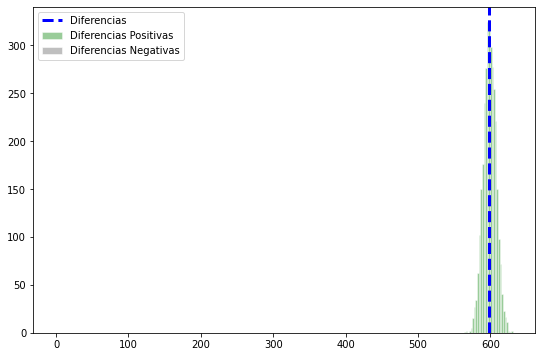

In [75]:
fig, ax = plt.subplots(figsize=(9,6))
hist(f_dif[f_dif>=0],bins=30,color="green", edgecolor="white", label="Diferencias Positivas", alpha= 0.4, )
hist(f_dif[f_dif<0],bins=30,color="gray", edgecolor="white", label="Diferencias Negativas", alpha= 0.5)
axvline(x=np.mean(dif), color="blue", linestyle="--", linewidth = 3, label = "Diferencias")
legend()
show()

Podemos concluir que tenemos una mejor presición con una muestra de 14 observaciones que de 15, debido a que tenemos un cociente menor, lo que implica que el error es más pequeño.